In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from PIL import Image
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
torch.manual_seed(1)
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
def load_data(train_batch_size, test_batch_size):
    # Fetch training data: total 60000 samples
        
    trainset = datasets.MNIST('data', train = True, download = False, 
                transform = transforms.Compose([
                transforms.ToTensor()
                ]))
    train_loader = torch.utils.data.DataLoader(trainset, batch_size = train_batch_size, shuffle=True)

    testset = datasets.MNIST('data', train = False, download = False, 
                transform = transforms.Compose([
                transforms.ToTensor()
                ]))
    test_loader = torch.utils.data.DataLoader(testset ,batch_size = test_batch_size, shuffle=True)

    return (train_loader, test_loader)

In [4]:
class Model1 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 5)
        self.fc2 = nn.Linear(5, 9)
        self.fc3 = nn.Linear(9, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val
    
class Model2 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 6)
        self.fc2 = nn.Linear(6, 12)
        self.fc3 = nn.Linear(12, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val
    
class Model3 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 9)
        self.fc2 = nn.Linear(9, 18)
        self.fc3 = nn.Linear(18, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

class Model4 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 10)
        self.fc2 = nn.Linear(10, 20)
        self.fc3 = nn.Linear(20, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val
    
class Model5 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 12)
        self.fc2 = nn.Linear(12, 24)
        self.fc3 = nn.Linear(24, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val
    
class Model6 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 14)
        self.fc2 = nn.Linear(14, 28)
        self.fc3 = nn.Linear(28, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

class Model7 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

class Model8 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 30)
        self.fc2 = nn.Linear(30, 60)
        self.fc3 = nn.Linear(60, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

class Model9 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 40)
        self.fc2 = nn.Linear(40, 80)
        self.fc3 = nn.Linear(80, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

class Model10 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 50)
        self.fc2 = nn.Linear(50, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

In [5]:
train_batch_size = 50
test_batch_size = 100
train_loader, test_loader = load_data(train_batch_size, test_batch_size)
epochs = 10

In [6]:
def calc_params(model):
    return sum(p.numel() for p in model.parameters())
def define_optimizer(model):
    return optim.Adam(model.parameters(), lr = 0.0001)

In [7]:
def train(model, optimizer, epoch, train_loader, loss_fn):
    model.train()
    n_correct = 0
    n_samples = 0
    train_loss = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        # Forward propagation
        output = model(data.view(-1, 784))
        loss = loss_fn(output, target)
        loss.backward()

        optimizer.step()
        train_loss += loss.data
        
        _, predicted = torch.max(output.data, 1)
        n_samples += target.size(0)
        n_correct += (predicted == target).sum().item()
        acc = 100.0 * n_correct / n_samples

    train_loss = (train_loss * 50) / len(train_loader.dataset)

    return train_loss, round(acc, 2)

In [8]:
def test(model, test_loader, loss_fn):
    model.eval()
    test_loss = 0
    correct = 0

    for data, target in test_loader:
        data, target = Variable(data), Variable(target)
        
        output = model(data.view(-1, 784))
        test_loss += loss_fn(output, target).data

        pred = np.argmax(output.data, axis=1)
        correct = correct + np.equal(pred, target.data).sum()

    test_loss = (test_loss * 100) / len(test_loader.dataset)
    acc = 100. * correct / len(test_loader.dataset)
    return test_loss, acc

In [9]:
def compute(model, optimizer):
    loss_fn = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs + 1):
        train_loss, train_acc = train(model, optimizer, epoch, train_loader, loss_fn)
        test_loss, test_acc = test(model, test_loader, loss_fn)
    loss_train_arr.append(train_loss)
    loss_test_arr.append(test_loss)
    param_arr.append(calc_params(model))
    print("Model Train loss: ", train_loss)
    print("Model Test loss: ", test_loss)
    train_acc_arr.append(train_acc)
    test_acc_arr.append(test_acc)


In [10]:
loss_train_arr = []
loss_test_arr = []
param_arr = []
test_acc_arr = []
train_acc_arr = []

In [11]:
model1 = Model1()
print("Model 1 parameters: ", (calc_params(model1)))
optimizer = define_optimizer(model1)
compute(model1, optimizer)

model2 = Model2()
torch.manual_seed(1)
print("Model 2 parameters: ", (calc_params(model2)))
optimizer = define_optimizer(model2)
compute(model2, optimizer)

model3 = Model3()
torch.manual_seed(1)
print("Model 3 parameters: ", (calc_params(model3)))
optimizer = define_optimizer(model3)
compute(model3, optimizer)

model4 = Model4()
torch.manual_seed(1)
print("Model 4 parameters: ", (calc_params(model4)))
optimizer = define_optimizer(model4)
compute(model4, optimizer)

model5 = Model5()
torch.manual_seed(1)
print("Model 5 parameters: ", (calc_params(model5)))
optimizer = define_optimizer(model5)
compute(model5, optimizer)

model6 = Model6()
torch.manual_seed(1)
print("Model 6 parameters: ", (calc_params(model6)))
optimizer = define_optimizer(model6)
compute(model6, optimizer)

model7 = Model7()
torch.manual_seed(1)
print("Model 7 parameters: ", (calc_params(model7)))
optimizer = define_optimizer(model7)
compute(model7, optimizer)

model8 = Model8()
torch.manual_seed(1)
print("Model 8 parameters: ", (calc_params(model8)))
optimizer = define_optimizer(model8)
compute(model8, optimizer)

model9 = Model9()
torch.manual_seed(1)
print("Model 9 parameters: ", (calc_params(model9)))
optimizer = define_optimizer(model9)
compute(model9, optimizer)

model10 = Model10()
torch.manual_seed(1)
print("Model 10 parameters: ", (calc_params(model10)))
optimizer = define_optimizer(model10)
compute(model10, optimizer)

Model 1 parameters:  4079
Model Train loss:  tensor(0.5876)
Model Test loss:  tensor(0.5512)
Model 2 parameters:  4924
Model Train loss:  tensor(0.4401)
Model Test loss:  tensor(0.4250)
Model 3 parameters:  7435
Model Train loss:  tensor(0.3544)
Model Test loss:  tensor(0.3474)
Model 4 parameters:  8280
Model Train loss:  tensor(0.3134)
Model Test loss:  tensor(0.3057)
Model 5 parameters:  9982
Model Train loss:  tensor(0.3083)
Model Test loss:  tensor(0.2991)
Model 6 parameters:  11700
Model Train loss:  tensor(0.2803)
Model Test loss:  tensor(0.2747)
Model 7 parameters:  13434
Model Train loss:  tensor(0.2664)
Model Test loss:  tensor(0.2637)
Model 8 parameters:  26020
Model Train loss:  tensor(0.2276)
Model Test loss:  tensor(0.2245)
Model 9 parameters:  35490
Model Train loss:  tensor(0.2049)
Model Test loss:  tensor(0.1998)
Model 10 parameters:  45360
Model Train loss:  tensor(0.1792)
Model Test loss:  tensor(0.1787)


In [12]:
temp_1 = []
for i in loss_train_arr:
    temp_1.append(i.data.numpy().tolist())

temp_2 = []
for i in loss_test_arr:
    temp_2.append(i.data.numpy().tolist())

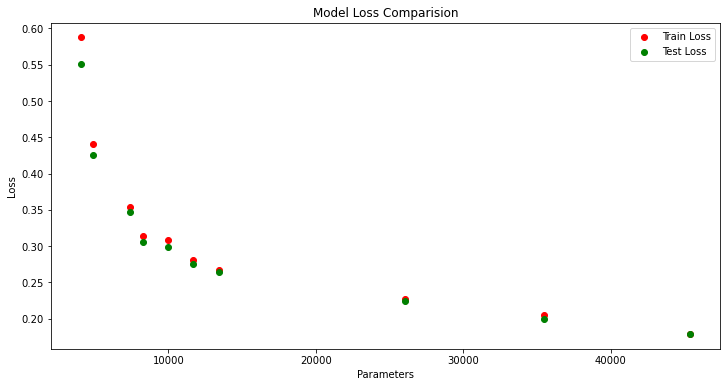

In [13]:
plt.figure(figsize=(12,6))
plt.scatter(param_arr, temp_1, color = "r")
plt.scatter(param_arr, temp_2, color = "g")
plt.title('Model Loss Comparision')
plt.legend(['Train Loss', 'Test Loss'])
plt.xlabel('Parameters')
plt.ylabel('Loss')
plt.show()

In [14]:
temp_3 = []
for i in test_acc_arr:
    temp_3.append(i.data.numpy().tolist())

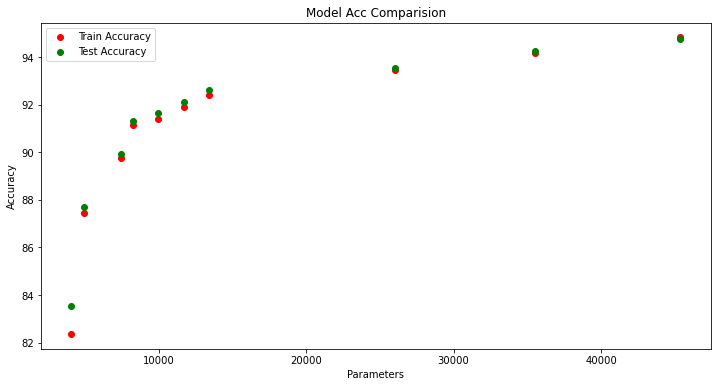

In [15]:
plt.figure(figsize=(12,6))
plt.scatter(param_arr, train_acc_arr, color = "r")
plt.scatter(param_arr, temp_3, color = "g")
plt.title('Model Acc Comparision')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.show()